## Caracterização meteorólogica da área de estudo

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superficie
2.  Meteorologia upperair ou sondagem/ perfil da atmosfera
3. Superficie - Albedo, razao de bowen e Rugosidade

In [10]:
#selecionar arquivo para analise
import os
rootPath= os.getcwd()
print(rootPath)


#definindo os diretorios com os arquivos metar
metSuperficiePath = rootPath + '\\inputs\\meteosuperficie'
print (metSuperficiePath) #comprovando que existe

#listando os arquivos dentro do diretorio
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\sergi\OneDrive\Documentos\GitHub\ENS5173_202401
C:\Users\sergi\OneDrive\Documentos\GitHub\ENS5173_202401\inputs\meteosuperficie
['metar_2023.csv.csv']


In [12]:
import pandas as pd
import os

# Caminho para a pasta contendo os arquivos CSV
metSuperficiePath = 'C:/Users/sergi/OneDrive/Documentos/GitHub/ENS5173_202401/inputs/meteosuperficie'
# Lista para armazenar os dados de cada arquivo
metSuperficie = []

# Iterando sobre cada arquivo na pasta
for file in os.listdir(metSuperficiePath):
    # Verificando se o arquivo tem extensão .csv
    if file.endswith('.csv'):
        # Lendo o arquivo CSV
        df = pd.read_csv(os.path.join(metSuperficiePath, file))
        # Verificando se o DataFrame não está vazio
        if not df.empty:
            # Adicionando o DataFrame à lista
            metSuperficie.append(df)

# Convertendo a lista de DataFrames para um único DataFrame
if metSuperficie:
    metSuperficie = pd.concat(metSuperficie, ignore_index=True)
else:
    metSuperficie = pd.DataFrame()  # Caso a lista esteja vazia, criando um DataFrame vazio

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [13]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


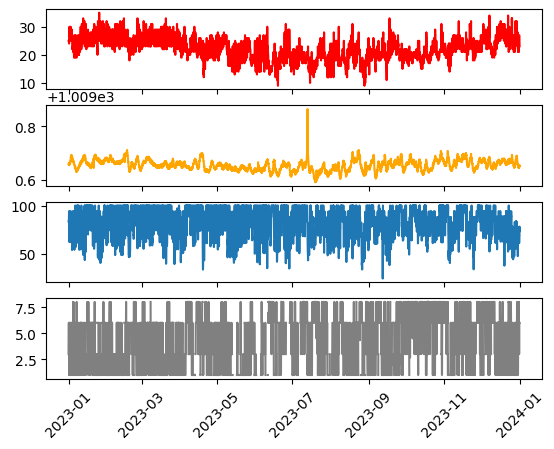

In [14]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da cco é:1009.6967607391396


{'whiskers': [<matplotlib.lines.Line2D at 0x1c6d689b810>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6d68a8f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6d68883d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6d68aa450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6d68aaed0>],
 'means': []}

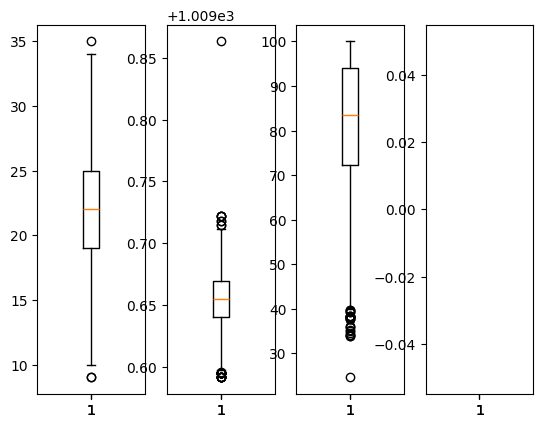

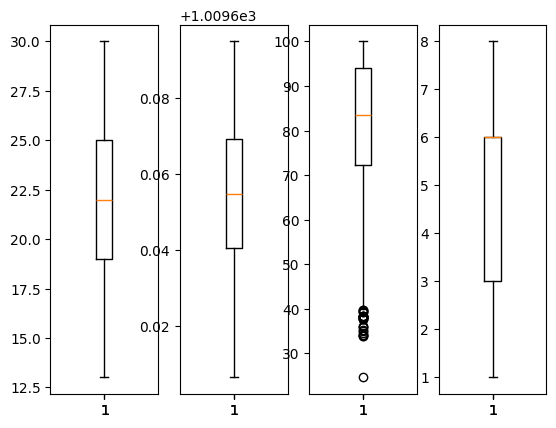

In [15]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 99°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:'+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:'+str(p99))
#print(metSuperficie['temp']<temp99)
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é:'+str(p99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])

In [6]:
#se eu quiser remover os nan para meu códigon aparecer um numero - nanpercentile
#~np.isnan

C:\Users\sergi\AppData\Local\Temp\ipykernel_8336\4243145845.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\sergi\AppData\Local\Temp\ipykernel_8336\4243145845.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\sergi\AppData\Local\Temp\ipykernel_8336\4243145845.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


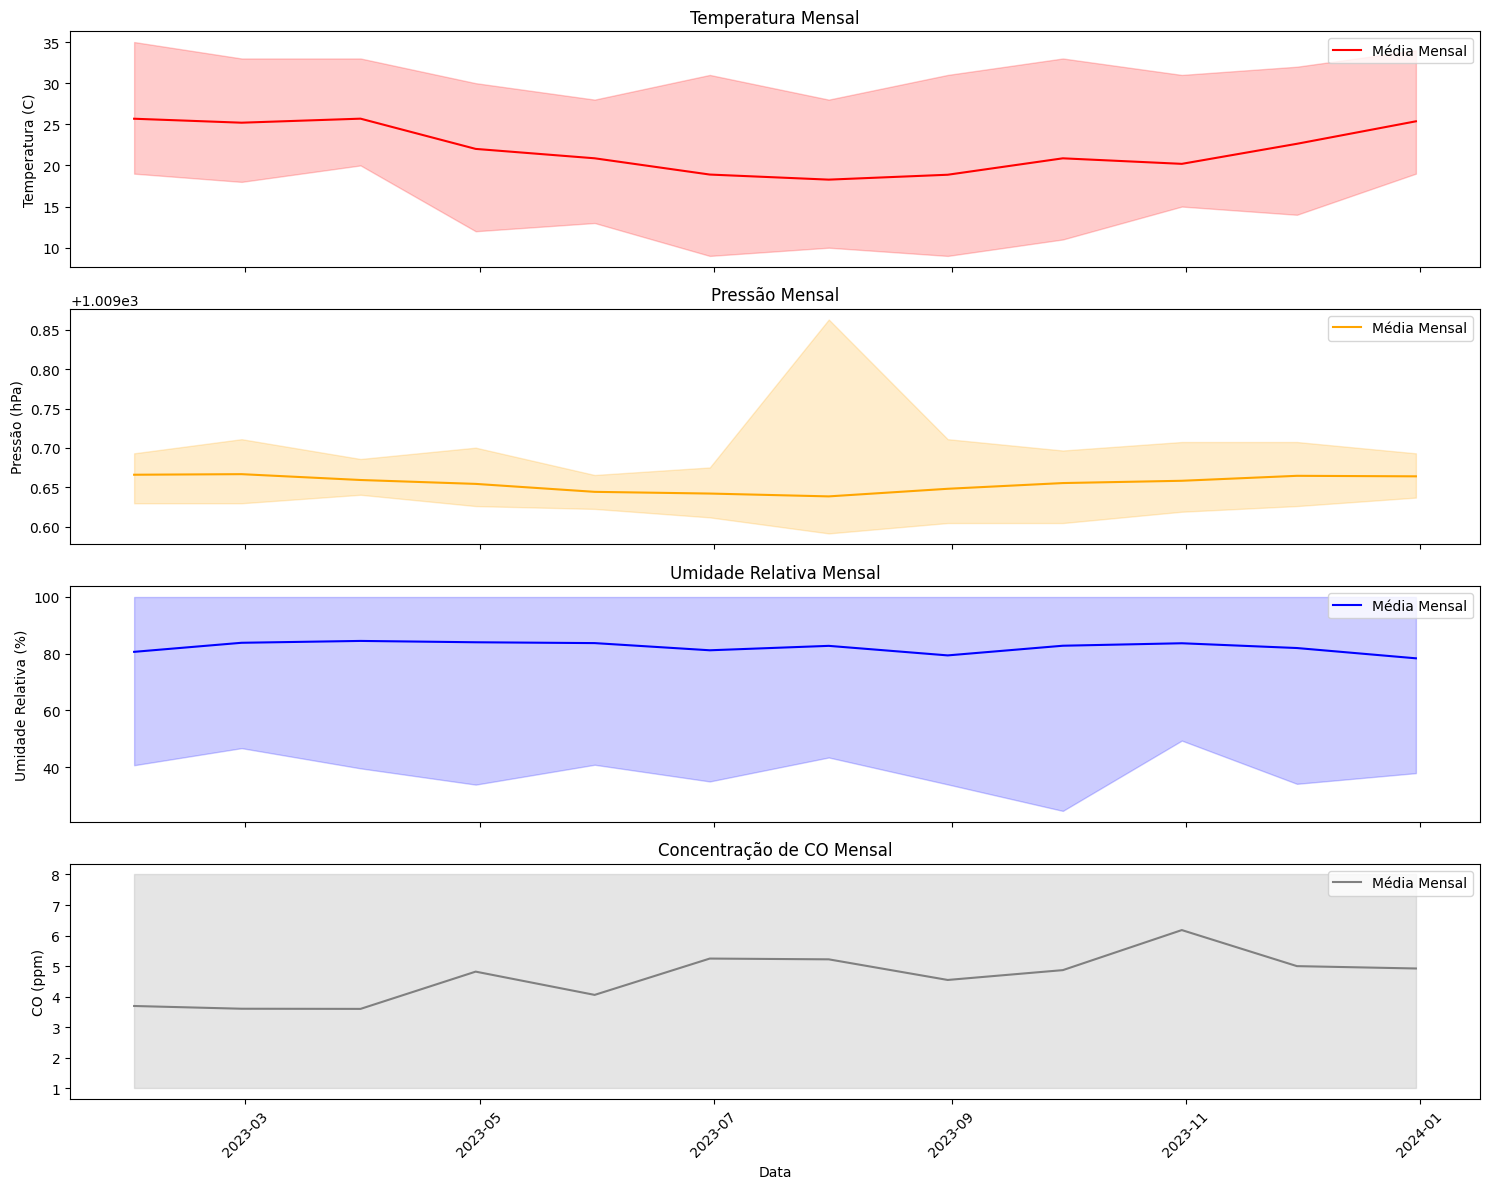

            day  month  year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                             
2023-01-31    1      1  2023     0 NaN  0.0  0.0  274.32  1.0  1.0   
2023-02-28    1      2  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-03-31    1      3  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   
2023-04-30    1      4  2023     0 NaN  0.0  0.0  243.84  1.0  1.0   
2023-05-31    1      5  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-06-30    1      6  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-07-31    1      7  2023     0 NaN  0.0  0.0   76.20  1.0  1.0   
2023-08-31    1      8  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-09-30    1      9  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-10-31    1     10  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-11-30    1     11  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-12-31    1     12  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   

                   

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que o DataFrame tenha uma coluna 'datetime' que precisa ser convertida
metSuperficie['datetime'] = pd.to_datetime(metSuperficie['datetime'])
metSuperficie.set_index('datetime', inplace=True)

# Estatísticas dos dados
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(4, sharex=True, figsize=(15, 12))

# Plotando a média mensal com manchas de max e min
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Média Mensal')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.2)
ax[0].set_ylabel('Temperatura (C)')
ax[0].set_title('Temperatura Mensal')
ax[0].legend()

ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Média Mensal')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.2)
ax[1].set_ylabel('Pressão (hPa)')
ax[1].set_title('Pressão Mensal')
ax[1].legend()

ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue', label='Média Mensal')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='blue', alpha=0.2)
ax[2].set_ylabel('Umidade Relativa (%)')
ax[2].set_title('Umidade Relativa Mensal')
ax[2].legend()

ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Média Mensal')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.2)
ax[3].set_ylabel('CO (ppm)')
ax[3].set_title('Concentração de CO Mensal')
ax[3].legend()
ax[3].tick_params(axis='x', rotation=45)

plt.xlabel('Data')
plt.tight_layout()
plt.show()

# Imprimindo os mínimos mensais
print(min_mensal)

In [8]:
#calcular gradiente temperatura para saber se a camada instavel, estavel ou neutra

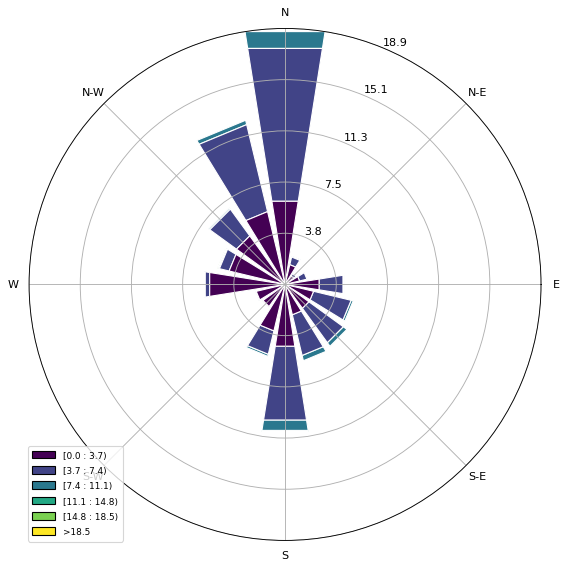

In [17]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

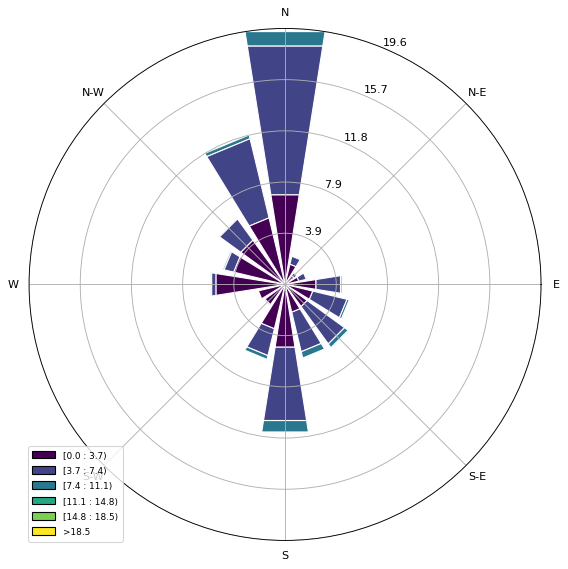

In [12]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

## Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

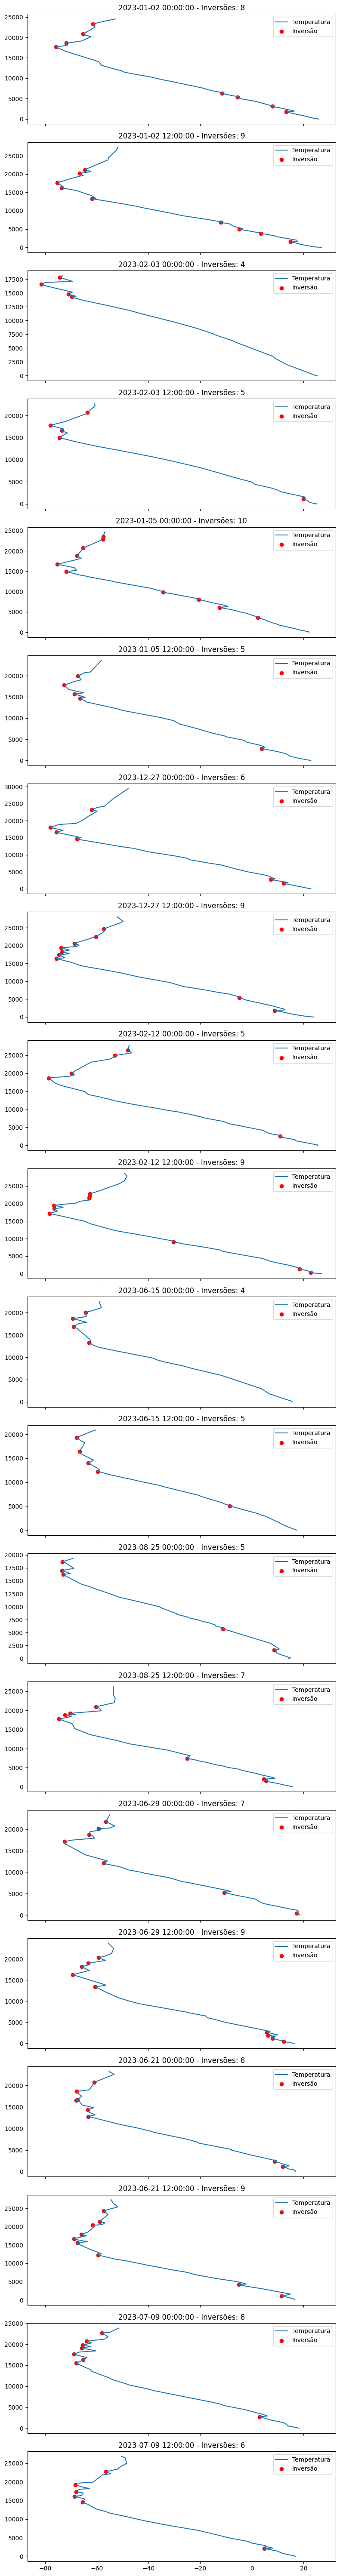

Relatório de Comparação de Inversões Térmicas
Verão (Dez, Jan, Fev) - 00h
Total de inversões: 33
Média de inversões: 6.60
Máximo de inversões: 10
Mínimo de inversões: 4

Verão (Dez, Jan, Fev) - 12h
Total de inversões: 37
Média de inversões: 7.40
Máximo de inversões: 9
Mínimo de inversões: 5

Inverno (Jun, Jul, Ago) - 00h
Total de inversões: 32
Média de inversões: 6.40
Máximo de inversões: 8
Mínimo de inversões: 4

Inverno (Jun, Jul, Ago) - 12h
Total de inversões: 36
Média de inversões: 7.20
Máximo de inversões: 9
Mínimo de inversões: 5


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Local da análise
station = 'SBFL'

# Inserindo de modo manual
dias = [2, 3, 5, 27, 12, 15, 25, 29, 21, 9] 
meses = [1, 2, 1, 12, 2, 6, 8, 6, 6, 7]
horas = [0, 12]

# Agrupar meses de verão e inverno
verao = [12, 1, 2]
inverno = [6, 7, 8]

# Criar figura e eixos para os subplots
fig, axs = plt.subplots(len(dias) * len(horas), sharex=True, figsize=(8, 60))

# Coletar dados e plotar
inversoes_verao_00 = []
inversoes_verao_12 = []
inversoes_inverno_00 = []
inversoes_inverno_12 = []

for i, (dia, mes) in enumerate(zip(dias, meses)):
    for u, hora in enumerate(horas):
        date = datetime(2023, mes, dia, hora)
        try:
            df = WyomingUpperAir.request_data(date, station)
        except Exception as e:
            print(f"Erro ao obter dados para {date}: {e}")
            continue

        ax = axs[i * 2 + u]
        if 'temperature' in df.columns and 'height' in df.columns:
            ax.plot(df['temperature'], df['height'], label='Temperatura')
            
            # Identificando pontos de inversão térmica
            inversoes = [num for num in range(1, len(df['temperature']) - 1)
                         if df['temperature'][num+1] > df['temperature'][num] and df['temperature'][num-1] >= df['temperature'][num]]
            
            num_inversoes = len(inversoes)
            ax.set_title(f"{date} - Inversões: {num_inversoes}")

            if inversoes:
                inversoes = np.array(inversoes)
                ax.scatter(df['temperature'][inversoes], df['height'][inversoes], color='red', marker='o', label='Inversão')
            ax.legend()
            
            # Armazenar contagens de inversões
            if mes in verao:
                if hora == 0:
                    inversoes_verao_00.append(num_inversoes)
                else:
                    inversoes_verao_12.append(num_inversoes)
            elif mes in inverno:
                if hora == 0:
                    inversoes_inverno_00.append(num_inversoes)
                else:
                    inversoes_inverno_12.append(num_inversoes)
        else:
            print(f"Colunas 'temperature' ou 'height' não encontradas para {date}")

plt.tight_layout()
plt.show()

# Relatório de Comparação de Inversões Térmicas
def calcular_estatisticas(inversoes):
    total = sum(inversoes)
    media = np.mean(inversoes) if inversoes else 0
    maximo = max(inversoes, default=0)
    minimo = min(inversoes, default=0)
    return total, media, maximo, minimo

# Verão
total_verao_00, media_verao_00, max_verao_00, min_verao_00 = calcular_estatisticas(inversoes_verao_00)
total_verao_12, media_verao_12, max_verao_12, min_verao_12 = calcular_estatisticas(inversoes_verao_12)

# Inverno
total_inverno_00, media_inverno_00, max_inverno_00, min_inverno_00 = calcular_estatisticas(inversoes_inverno_00)
total_inverno_12, media_inverno_12, max_inverno_12, min_inverno_12 = calcular_estatisticas(inversoes_inverno_12)

print("Relatório de Comparação de Inversões Térmicas")
print("=============================================")
print("Verão (Dez, Jan, Fev) - 00h")
print(f"Total de inversões: {total_verao_00}")
print(f"Média de inversões: {media_verao_00:.2f}")
print(f"Máximo de inversões: {max_verao_00}")
print(f"Mínimo de inversões: {min_verao_00}\n")

print("Verão (Dez, Jan, Fev) - 12h")
print(f"Total de inversões: {total_verao_12}")
print(f"Média de inversões: {media_verao_12:.2f}")
print(f"Máximo de inversões: {max_verao_12}")
print(f"Mínimo de inversões: {min_verao_12}\n")

print("Inverno (Jun, Jul, Ago) - 00h")
print(f"Total de inversões: {total_inverno_00}")
print(f"Média de inversões: {media_inverno_00:.2f}")
print(f"Máximo de inversões: {max_inverno_00}")
print(f"Mínimo de inversões: {min_inverno_00}\n")

print("Inverno (Jun, Jul, Ago) - 12h")
print(f"Total de inversões: {total_inverno_12}")
print(f"Média de inversões: {media_inverno_12:.2f}")
print(f"Máximo de inversões: {max_inverno_12}")
print(f"Mínimo de inversões: {min_inverno_12}") 

In [19]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

## Análise de dados no espaço
Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica

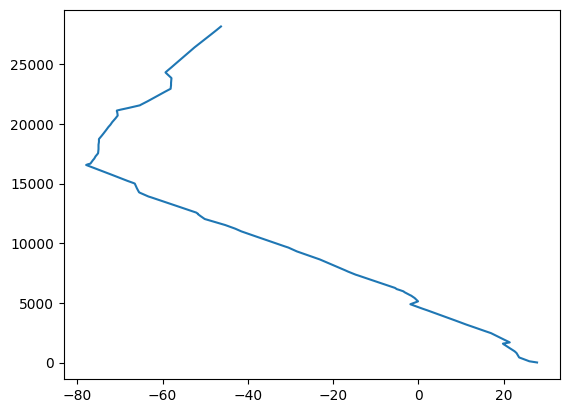

In [20]:
# Fazendo figura do perfil de temperatura
fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

[-1.8        -0.74303406 -0.16574586 -0.30075188 -0.35714286 -0.43613707
 -0.42857143 -0.48780488 -0.32786885  1.53846154 -0.57416268 -0.56338028
 -0.82191781 -0.80139373 -0.80701754 -0.75362319 -0.77014218 -0.81481481
 -0.7651715   0.75675676  0.70175439 -0.28409091 -0.28846154 -0.41322314
 -0.39473684 -0.66666667 -0.52830189 -0.31746032 -0.80357143 -0.86419753
 -0.40816327 -0.82969432 -0.83003953 -0.82687339 -0.82417582 -0.89285714
 -0.69498069 -0.61946903 -0.65265487 -0.79881657 -0.61919505 -0.85106383
 -0.85106383 -0.81188119 -0.81325301 -0.80378251 -0.63636364 -0.71428571
 -0.77192982 -0.9486166  -0.40160643 -0.375       0.         -0.40816327
 -0.82568807 -0.82833133 -0.8974359  -0.63492063 -0.5        -0.15060241
 -0.12626263 -0.66666667 -0.77777778 -0.71969697 -0.73200993  0.71428571
  1.05263158  0.20338983  0.24390244  0.15873016  0.23255814  0.22556391
  0.          0.02941176  0.          0.          0.04291845  0.
  0.234375    0.2247191   0.2166065   0.20833333  0.2040816

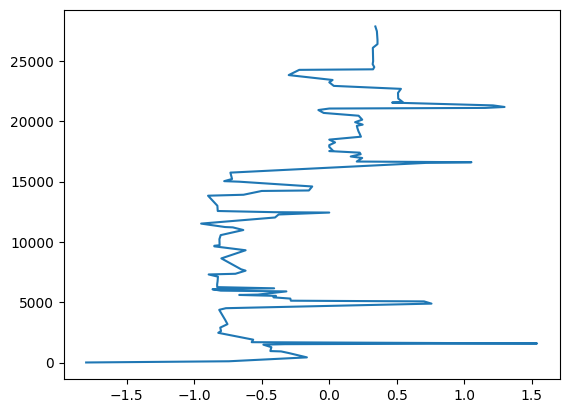

In [21]:
# Calcular gradiente de temperatura

deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

['Best GFS Quarter Degree Forecast Time Series']
['time1', 'latitude', 'reftime1', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


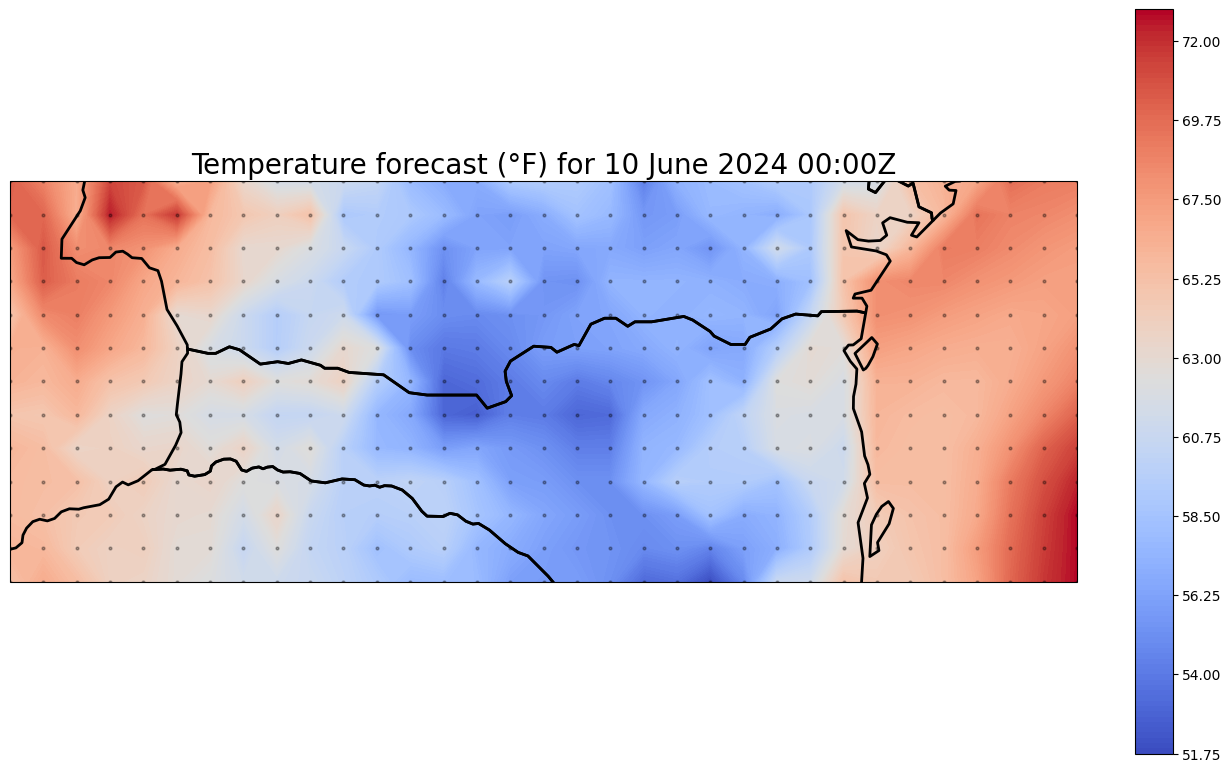

In [105]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np

from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

## Avaliação da altura da camada limite e turbulência em 2023

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
data = pd.read_csv("C:/Users/sergi/OneDrive/Documentos/GitHub/ENS5173_202401/inputs/dado_meteo.csv", encoding='utf-8')

# Renomear as colunas para facilitar o acesso
data.columns = [
    'Ano', 'mes', 'dia', 'hora',
    'fluxo_calor_sensivel', 'velocidade_friccao', 'escala_velocidade_convectiva',
    'gradiente_temp_potencial', 'altura_mistura_convectiva', 'altura_mistura_mecanica',
    'comprimento_monin_obukhov', 'comprimento_rugosidade', 'razao_bowen', 'albedo',
    'velocidade_vento', 'direcao_vento', 'altura_anemometro',
    'temperatura', 'altura_temperatura',
    'codigo_precipitacao', 'quantidade_precipitacao', 'umidade_relativa',
    'pressao_estacao', 'cobertura_nuvens', 
]

# Calcular a estabilidade da camada limite
data['estabilidade'] = np.where(data['comprimento_monin_obukhov'] > 0, 'Estável', 'Instável')

# Calcular a média da velocidade do vento
media_velocidade_vento = data['velocidade_vento'].mean()

# Calcular a média da temperatura
media_temperatura = data['temperatura'].mean()

# Calcular a média da umidade relativa
media_umidade = data['umidade_relativa'].mean()

# Calcular a intensidade da turbulência
data['intensidade_turbulencia'] = data['velocidade_friccao'] / data['velocidade_vento']

# Visualizar algumas estatísticas
print("Média da Velocidade do Vento:", media_velocidade_vento)
print("Média da Temperatura:", media_temperatura)
print("Média da Umidade Relativa:", media_umidade)

Média da Velocidade do Vento: 4.998271124341653
Média da Temperatura: 295.1247881841081
Média da Umidade Relativa: 82.49232882986031


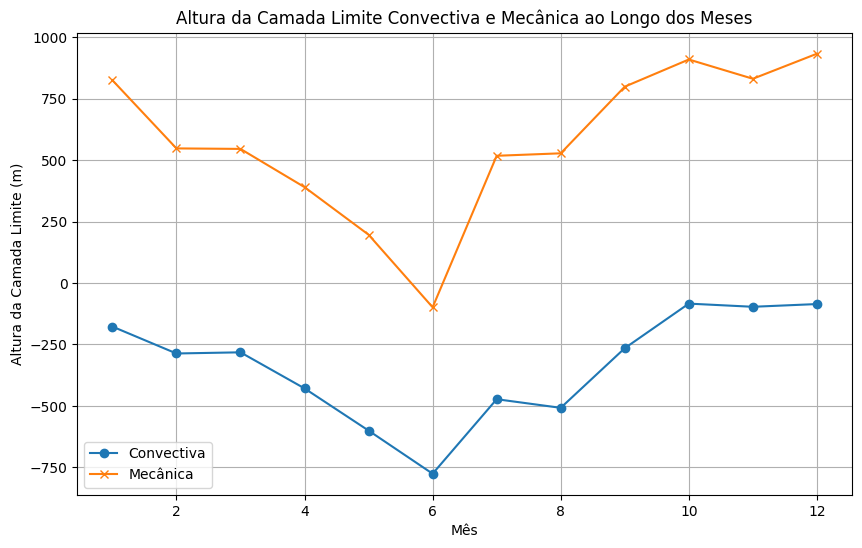

In [141]:
# Gráfico da altura da camada limite convectiva e mecânica ao longo dos meses
plt.figure(figsize=(10, 6))
plt.plot(data.groupby('mes')['altura_mistura_convectiva'].mean(), marker='o', label='Convectiva')
plt.plot(data.groupby('mes')['altura_mistura_mecanica'].mean(), marker='x', label='Mecânica')
plt.xlabel('Mês')
plt.ylabel('Altura da Camada Limite (m)')
plt.title('Altura da Camada Limite Convectiva e Mecânica ao Longo dos Meses')
plt.legend()
plt.grid(True)
plt.show()





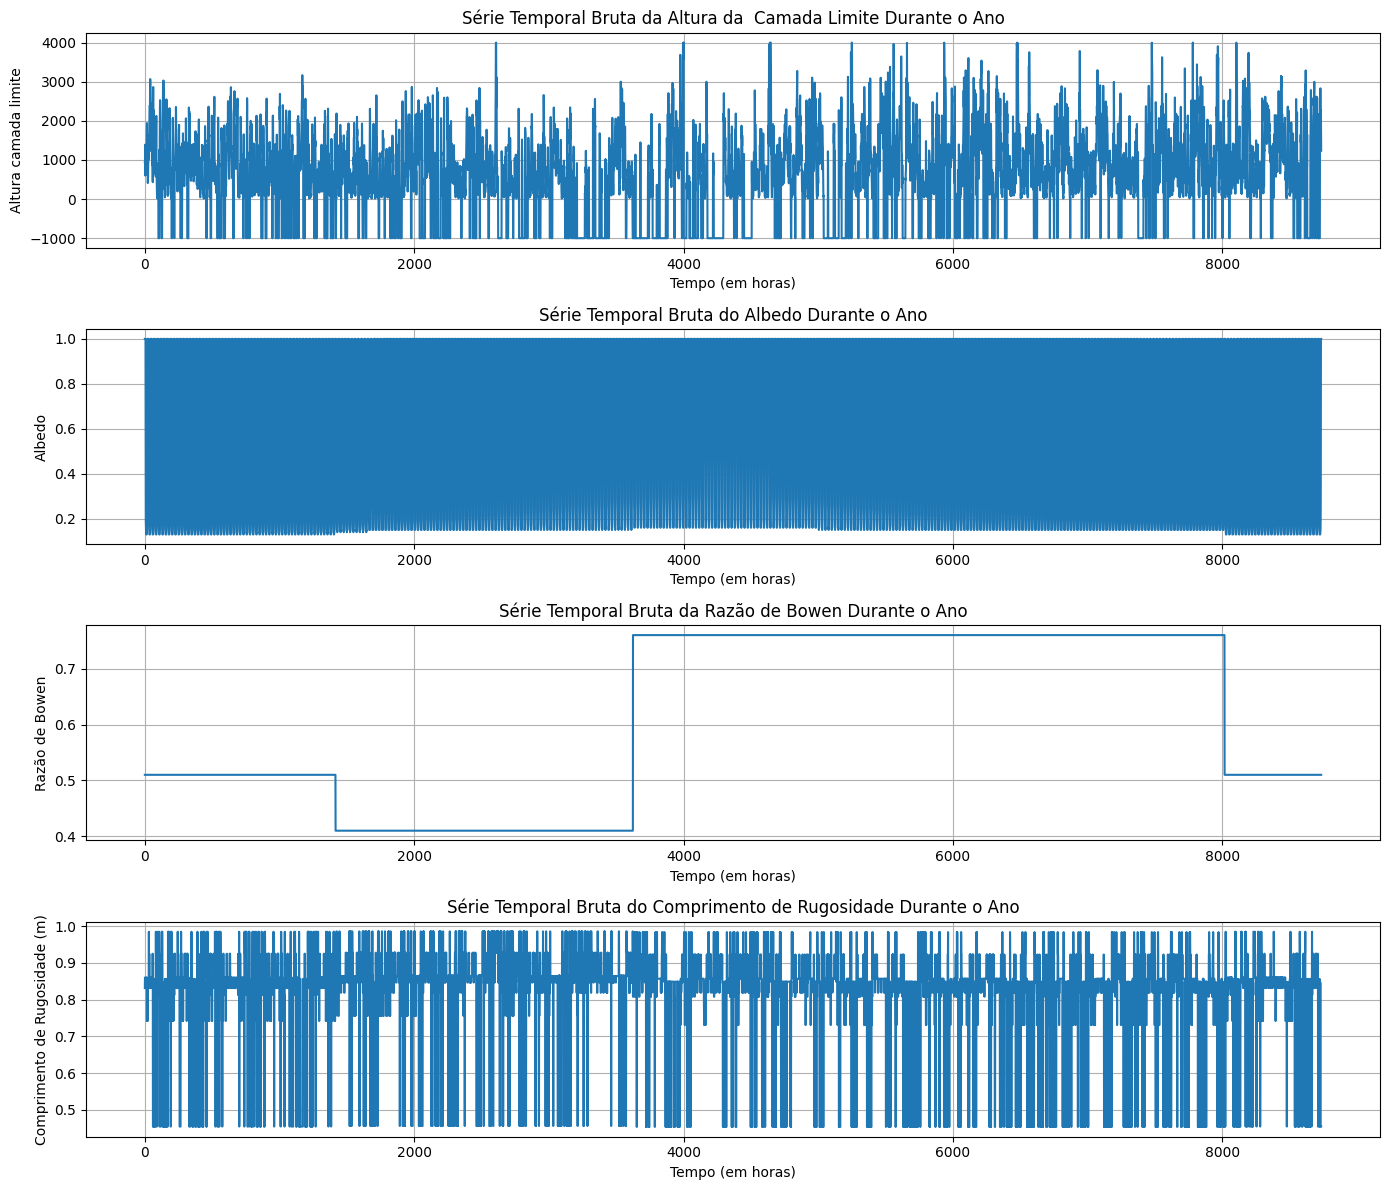

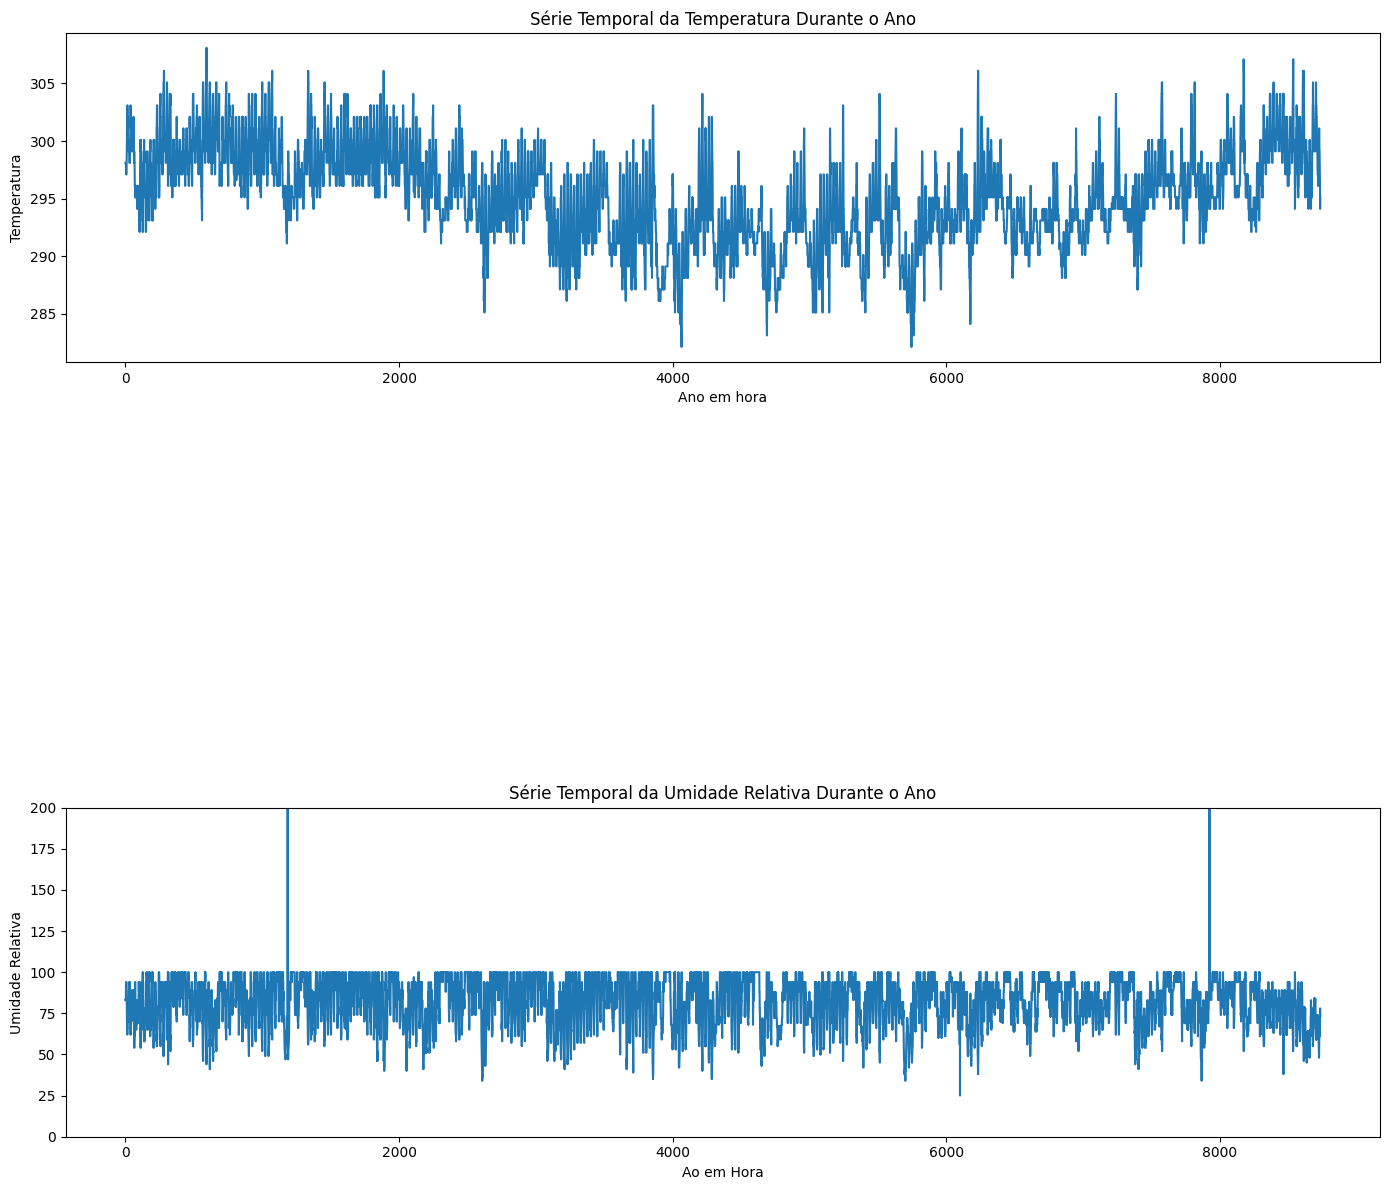

In [162]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(14, 12))


data_filtered = data[['hora', 'altura_mistura_mecanica', 'albedo', 'razao_bowen', 'comprimento_rugosidade']].dropna()
# Gráfico de série temporal para altura da mistura convectiva
plt.subplot(4, 1, 1)
sns.lineplot(x=range(len(data_filtered)), y='altura_mistura_mecanica',data=data_filtered, marker='', linestyle='-')
plt.title('Série Temporal Bruta da Altura da  Camada Limite Durante o Ano')
plt.xlabel('Tempo (em horas)')
plt.ylabel('Altura camada limite')
plt.grid(True)

# Gráfico de série temporal para albedo
plt.subplot(4, 1, 2)
sns.lineplot(x=range(len(data_filtered)), y='albedo', data=data_filtered, marker='', linestyle='-')
plt.title('Série Temporal Bruta do Albedo Durante o Ano')
plt.xlabel('Tempo (em horas)')
plt.ylabel('Albedo')
plt.grid(True)

# Gráfico de série temporal para razão de Bowen
plt.subplot(4, 1, 3)
sns.lineplot(x=range(len(data_filtered)), y='razao_bowen', data=data_filtered, marker='', linestyle='-')
plt.title('Série Temporal Bruta da Razão de Bowen Durante o Ano')
plt.xlabel('Tempo (em horas)')
plt.ylabel('Razão de Bowen')
plt.grid(True)

# Gráfico de série temporal para comprimento de rugosidade
plt.subplot(4, 1, 4)
sns.lineplot(x=range(len(data_filtered)), y='comprimento_rugosidade', data=data_filtered, marker='', linestyle='-')
plt.title('Série Temporal Bruta do Comprimento de Rugosidade Durante o Ano')
plt.xlabel('Tempo (em horas)')
plt.ylabel('Comprimento de Rugosidade (m)')
plt.grid(True)

# Ajustar o layout
plt.tight_layout()


# Configurar o tamanho do gráfico
plt.figure(figsize=(14, 12))

# Gráfico de série temporal para temperatura
plt.subplot(3, 1, 1)
sns.lineplot(x=range(len(data)), y='temperatura', data=data)
plt.title('Série Temporal da Temperatura Durante o Ano')
plt.xlabel('Ano em hora')
plt.ylabel('Temperatura')

# Gráfico de série temporal para umidade relativa
plt.subplot(3, 1, 3)
sns.lineplot(x=range(len(data)), y='umidade_relativa', data=data)
plt.title('Série Temporal da Umidade Relativa Durante o Ano')
plt.xlabel('Ao em Hora')
plt.ylabel('Umidade Relativa')
plt.ylim(0, 200)  # Definir os limites do eixo Y de 0 a 200

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()



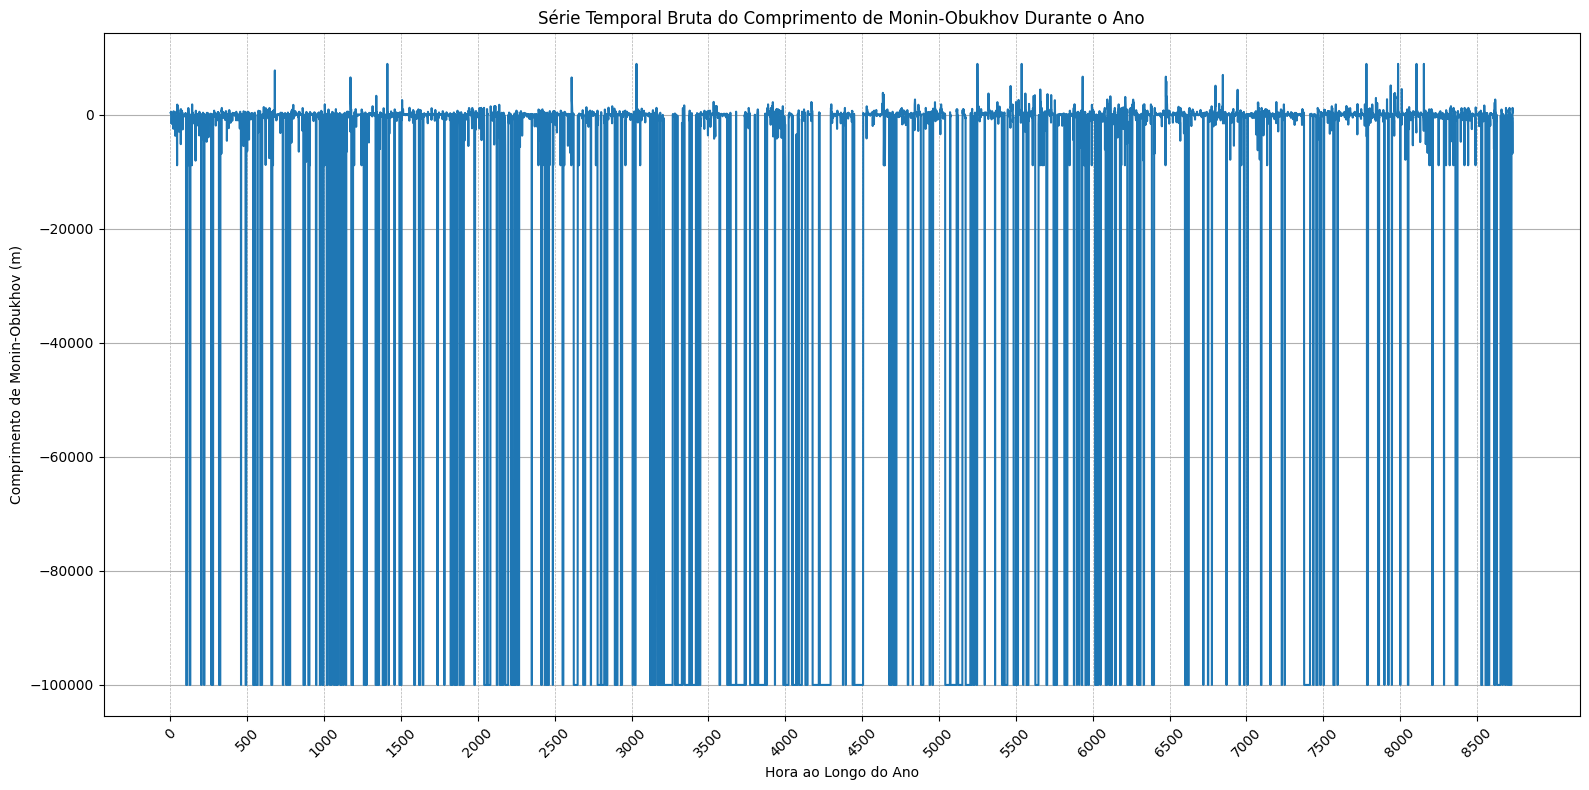

In [132]:



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criar uma nova coluna 'hora_ano' que representa a hora ao longo do ano
data['hora_ano'] = np.arange(1, len(data) + 1)

# Configurar o tamanho do gráfico
plt.figure(figsize=(16, 8))

# Gráfico de série temporal para comprimento de Monin-Obukhov
sns.lineplot(x='hora_ano', y='comprimento_monin_obukhov', data=data, marker='', linestyle='-')
plt.title('Série Temporal Bruta do Comprimento de Monin-Obukhov Durante o Ano')
plt.xlabel('Hora ao Longo do Ano')
plt.ylabel('Comprimento de Monin-Obukhov (m)')
plt.grid(True)



# Personalizar os ticks do eixo x
plt.xticks(np.arange(0, len(data), 500), rotation=45)

# Adicionar grade apenas nos ticks principais do eixo x
plt.gca().xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


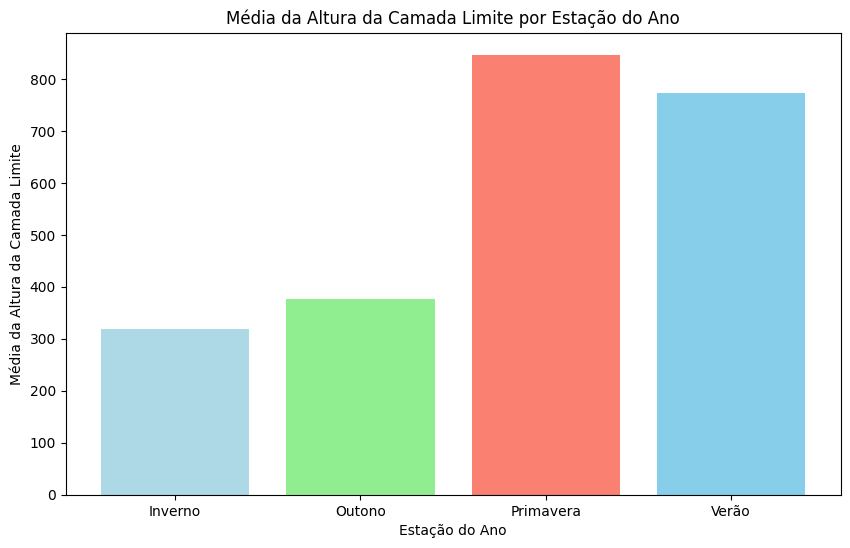

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo as estações do ano
estacoes = {
    'Primavera': [9, 10, 11],
    'Verão': [12, 1, 2],
    'Outono': [3, 4, 5],
    'Inverno': [6, 7, 8]
}

# Função para mapear o mês para a estação do ano
def encontrar_estacao(mes):
    for estacao, meses_estacao in estacoes.items():
        if mes in meses_estacao:
            return estacao

# Criando uma nova coluna 'estacao' com base no mês
data['estacao'] = data['mes'].apply(encontrar_estacao)

# Calcular a média da altura da camada limite por estação do ano
media_altura_camada_limite_por_estacao = data.groupby('estacao')['altura_mistura_mecanica'].mean()

# Definindo cores para cada estação do ano
cores = ['lightblue', 'lightgreen', 'salmon', 'skyblue']

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para a média da altura da camada limite por estação do ano
plt.bar(media_altura_camada_limite_por_estacao.index, media_altura_camada_limite_por_estacao, color=cores)
plt.title('Média da Altura da Camada Limite por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Média da Altura da Camada Limite')

# Mostrar o gráfico
plt.show()


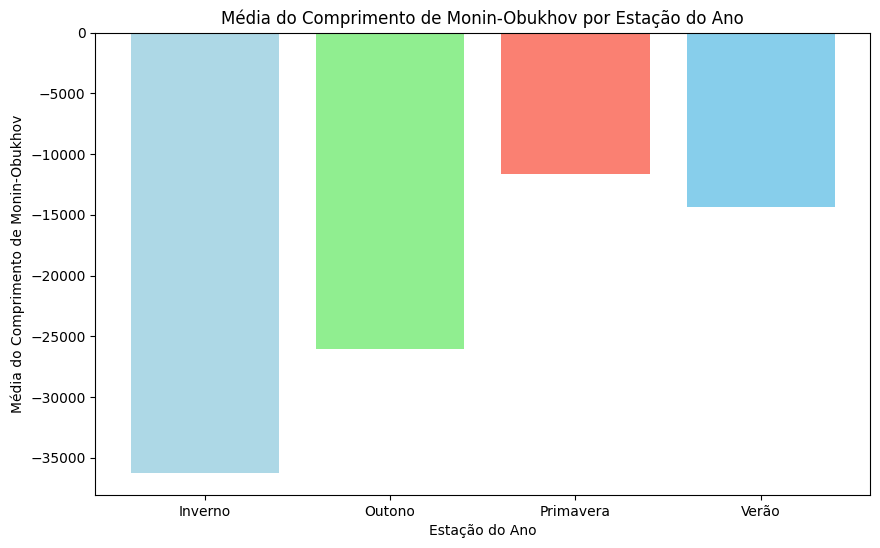

In [157]:
import matplotlib.pyplot as plt

# Calcular a média do comprimento de Monin-Obukhov por estação do ano
media_comprimento_monin_obukhov_por_estacao = data.groupby('estacao')['comprimento_monin_obukhov'].mean()

# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para a média do comprimento de Monin-Obukhov por estação do ano
plt.bar(media_comprimento_monin_obukhov_por_estacao.index, media_comprimento_monin_obukhov_por_estacao, color=cores)
plt.title('Média do Comprimento de Monin-Obukhov por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Média do Comprimento de Monin-Obukhov')

# Mostrar o gráfico
plt.show()
